### Visual intuition for the other definition of variance


I always think of the [variance](https://en.wikipedia.org/wiki/Variance) of some random variable $X$ as $X$'s expected deviation from its mean, $\mu$. That is, I think of the variance as: $Var(X) =\mathbb{E}[(X - \mu)^2]$. Because $\mu$ is the expected value or average of $X$ you can also express the variance as:

$$Var(X)= \mathbb{E}[(X - \mathbb{E}[X])^2]$$

where $\mu = \mathbb{E}[X]$. 

On Wikipedia and in textbooks the variance is also sometimes defined as:

$$Var(X) =\mathbb{E}[X^2] - \mathbb{E}[X]^2$$

which is expected value of $X$ squared, minus the expected square of $X$. I never find this other definition intuitive. This is a visual demonstration of the second definition of variance. (If you are curious about the algebra, I also plow through the derivation at the end of the post).


### Get some data

Let's start by drawing some data from a 1 dimensional normal with some mean and some standard deviation. I'll make a histogram to visualize the data. I'll also plot the actual data as blue dots along the x axis.

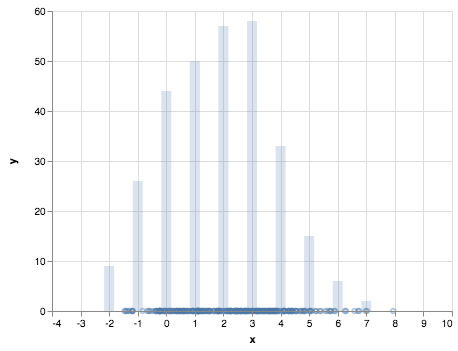

In [4]:
import numpy as np
mu, sigma = 2.5, 2 # mean and standard deviation
N = 300
nbins = 10
s = [o for o in np.random.normal(mu, sigma, size=N)]

values, bins = np.histogram(s, bins=np.arange(-3, nbins + 1))

dt = make_altair_object(bins, values)

c1 = make_bar_chart(size=10, opacity=.2, data=dt)

dt = make_altair_object(s, np.zeros(len(s)))

x_points = alt.Chart(dt).mark_point(size=20, opacity=.4).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )

c1 + x_points

If we remove the bars and plot $x_i^2$ for each datapoint $x_i$ as black dots, we have a line of black dots along the curve of $X^2$. I show each $x_i$ with a little black line leading to the corresponding value of $x_i^2$.

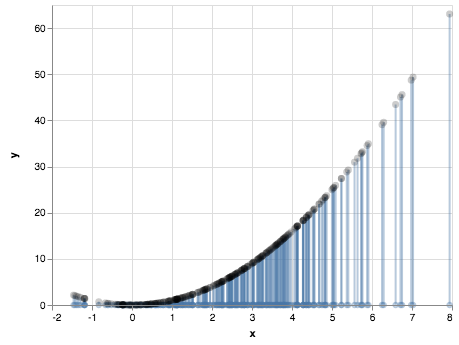

In [6]:
x = np.linspace(min(s), max(s), 1000)
y = [x_i ** 2 for x_i in x]
dt = make_altair_object(x, y)


x2 = alt.Chart(dt).mark_line(opacity=line_opacity, color="black").encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object(X=s, Y=[i ** 2 for i in s])

x2_points = alt.Chart(dt).mark_point(opacity=point_opacity, size=point_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

x_points  + x2_points

guide_lies = []

for x, x_2 in zip(s, [i ** 2 for i in s]):
    Xs = [x, x]
    Ys = [0, x_2]
    dt = make_altair_object(X=Xs, Y=Ys)
    guide_lies.append(alt.Chart(dt).mark_line(opacity=.4).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    ))

import functools

functools.reduce(lambda a,b : a+b,guide_lies + [x_points  + x2_points])

Each black dot represents the value of some blue $x$, squared. Because each $x$ has equal probability mass (i.e. $\frac{1}{|S|}$) if we simple average the y-coordinates of the black dots, we get the expected value of $X^2$. That is, we get $\mathbb{E}[X^2]$. We show this as a black dot on the chart. We can also plot the expected value of each $x_i$ as a blue dot. This is $\mathbb{E}[X]$.

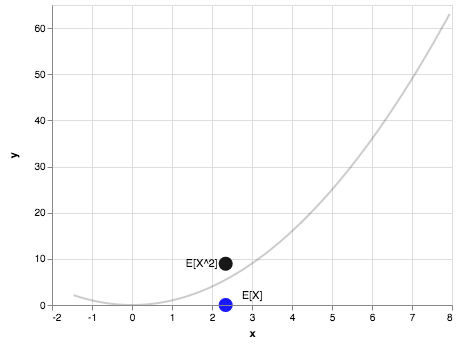

In [8]:
expectedx2 = np.mean([i ** 2 for i in s])


def make_altair_object_labels(X, Y, L):
        bi = []
        for x, y, l in zip(X,Y,L):
            bi.append({"x":x, "y":y, "label": l})
        return alt.Data({"values" : bi})

dt = make_altair_object_labels(X=[np.mean(s)], Y=[expectedx2], L=["E[X^2]"])
                                
expected_x2 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object_labels(X=[np.mean(s)], Y=[0], L=["E[X]"])
                                
expected_x = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="blue", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

text = expected_x2.mark_text(
    align='right',
    baseline='middle',
    dx=7,
    xOffset=-15,    
).encode(
    text='label:N'
)


text2 = expected_x.mark_text(
    align='left',
    baseline='bottom',
    yOffset=-4,
    dx=16
).encode(
    text='label:N'
)

x2 + expected_x2 + text + expected_x + text2

If we square the expected value of the Xs we get $\mathbb{E}[X]^2$. We show this as another blue dot. 

In [9]:
dt = make_altair_object_labels(X=[np.mean(s)], Y=[np.mean(s)** 2], L=["E[X]^2"])

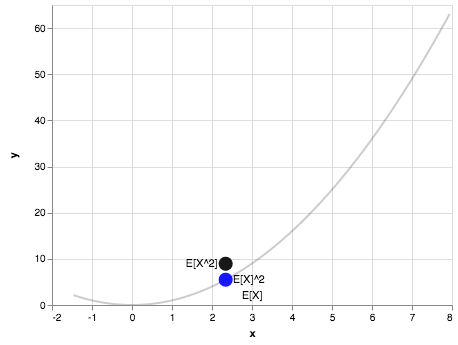

In [12]:
c7 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="blue", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

text7 = c7.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='label:N'
)
x2 + expected_x2 + text + text2 + c7 +  text7

The distance between $\mathbb{E}[X^2]$ and $\mathbb{E}[X]^2$ is $\mathbb{E}[X^2]$ - $\mathbb{E}[X]^2$, the variance!

Because $\mathbb{E}[X^2]$ is always above the black squares line, this also doubles as a visual proof that the variance is always non-negative. (See also this [awesome visual proof](http://mark.reid.name/blog/behold-jensens-inequality.html) of Jensen's Inequality, which gave me the idea for this post).

In [3]:
import altair as alt
from vega_datasets import data

import numpy as np

def make_bar_chart(size, opacity, data):
    return alt.Chart(data).mark_bar(size=10, opacity=.2).encode(
        x='x:Q',  # specify ordinal data
        y='y:Q',  # specify quantitative data
    )
    return


def make_altair_object(X, Y):
    bi = []
    for x, y in zip(X,Y):
        bi.append({"x":x, "y":y})
    return alt.Data({"values" : bi})

point_size = 50
expectation_size = 200
point_opacity = .2
expectation_opacity = .9
line_opacity=.2


### Plowing through the algebra 

This post is devoted to providing a visual intution for the alternate definition of variance. If you are curious about the algebra behind the definition, here is a detailed derivation as well.

Starting from the definition and expanding the square we have

$$Var(X) = \mathbb{E}[(x - \mathbb{E}[X])^2]$$

$$Var(X) = \mathbb{E}[X^2 - 2XE[X] + \mathbb{E}[X]^2]$$

From linearity of expectation we have:

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[2XE[X]] +  \mathbb{E}[\mathbb{E}[X]^2]$$

We can pull out the constants 2 and $\mathbb{E}[X]$ from the expectation in the middle term to get:

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X]\mathbb{E}E[X] +  \mathbb{E}[\mathbb{E}[X^2]$$

We can also express the middle term as $2\mathbb{E}[X^2]$ to get

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[X^2] -  \mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2] -   \mathbb{E}[X^2]$$